In [1]:
from meerkat import ds3231, parser

import pandas as pd

from importlib import reload

In [2]:
rtc = ds3231.DS3231(bus_n=1, bus_addr=0x68)

In [3]:
rtc.get_time()

(2020, 12, 13, 21, 42, 25)

In [4]:
rtc.get_temp()

20.0

In [5]:
rtc.publish(description="test_1", n=1)

'{"description": "test_1", "sample_n": 0, "rtc_time": "2020-12-13 21:42:25", "temp_C": 20.0, "std_time_ms": "2020-12-13 20:43:23.914827"}'

In [6]:
rtc.publish(description="test_1", n=2, delay=3)

['{"description": "test_1", "sample_n": 0, "rtc_time": "2020-12-13 21:42:25", "temp_C": 20.0, "std_time_ms": "2020-12-13 20:43:23.932123"}',
 '{"description": "test_1", "sample_n": 0, "rtc_time": "2020-12-13 21:42:28", "temp_C": 20.0, "std_time_ms": "2020-12-13 20:43:26.937450"}']

In [7]:
# default writer format is CSV, switch to JSON
rtc.writer_output = 'json'

In [8]:
rtc.json_writer.metadata

{'name': 'DS3231', 'urls': 'https://datasheets.maximintegrated.com/en/ds/DS3231.pdf', 'manufacturer': 'Adafruit Industries', 'header': ['description', 'sample_n', 'rtc_time', 'temp_C'], 'dtype': ['str', 'int', 'str', 'float'], 'units': [None, 'count', 'datetime', 'degrees Celcius'], 'accuracy': [None, 1, '+/- 3.5 ppm', '+/- 3.0'], 'precision': [None, 1, '1 second', 0.25], 'bus_n': 1, 'bus_addr': '0x68', 'description': 'Adafruit DS3221 Precision RTC', 'rtc_time_source': '%Y-%m-%d %H:%M:%S'}

In [9]:
# writer method with description and sample number
rtc.write(description='test_2', n=6, delay=1)

In [10]:
rtc.json_writer.path

'2020_12_13_20_43_30_ds3231.jsontxt'

In [11]:
with open(rtc.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_2", "sample_n": 0, "rtc_time": "2020-12-13 21:42:31", "temp_C": 20.0, "std_time_ms": "2020-12-13 20:43:30.041333"}
{"description": "test_2", "sample_n": 1, "rtc_time": "2020-12-13 21:42:32", "temp_C": 20.0, "std_time_ms": "2020-12-13 20:43:31.045605"}
{"description": "test_2", "sample_n": 2, "rtc_time": "2020-12-13 21:42:33", "temp_C": 20.0, "std_time_ms": "2020-12-13 20:43:32.049301"}
{"description": "test_2", "sample_n": 3, "rtc_time": "2020-12-13 21:42:34", "temp_C": 20.0, "std_time_ms": "2020-12-13 20:43:33.052928"}


In [12]:
# switch back to CSV format
rtc.writer_output = 'csv'

In [13]:
rtc.write(description='test_3', n=6, delay=1)

In [14]:
m, df = parser.csv_resource(rtc.csv_writer.path)

In [15]:
df["rtc_datetime64_ns"] = pd.to_datetime(df.rtc_time)
df.temp_C = df.temp_C.astype(float)

In [16]:
df.dtypes

std_time_ms                  object
description                  object
sample_n                      int64
rtc_time                     object
temp_C                      float64
datetime64_ns        datetime64[ns]
rtc_datetime64_ns    datetime64[ns]
dtype: object

In [17]:
df

,std_time_ms,description,sample_n,rtc_time,temp_C,datetime64_ns,rtc_datetime64_ns
0,2020-12-13 20:43:36.159805,test_3,0,2020-12-13 21:42:37,20.0,2020-12-13 20:43:36.159805,2020-12-13 21:42:37
1,2020-12-13 20:43:37.163392,test_3,1,2020-12-13 21:42:38,20.0,2020-12-13 20:43:37.163392,2020-12-13 21:42:38
2,2020-12-13 20:43:38.166982,test_3,2,2020-12-13 21:42:39,20.0,2020-12-13 20:43:38.166982,2020-12-13 21:42:39
3,2020-12-13 20:43:39.170642,test_3,3,2020-12-13 21:42:40,20.0,2020-12-13 20:43:39.170642,2020-12-13 21:42:40
4,2020-12-13 20:43:40.174216,test_3,4,2020-12-13 21:42:41,20.0,2020-12-13 20:43:40.174216,2020-12-13 21:42:41
5,2020-12-13 20:43:41.177811,test_3,5,2020-12-13 21:42:42,20.0,2020-12-13 20:43:41.177811,2020-12-13 21:42:42


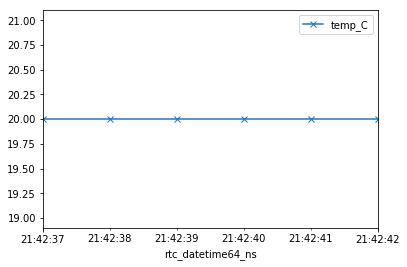

In [18]:
df[["rtc_datetime64_ns", "temp_C"]].plot(x="rtc_datetime64_ns", marker="x");